In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Parkinsson disease.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
data.drop(columns=['name'], inplace=True)
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
data[data['status']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),48.0,181.937771,52.731067,110.739000,120.947500,198.996000,229.077000,260.105000
MDVP:Fhi(Hz),48.0,223.636750,96.727067,113.597000,139.413250,231.161500,251.239250,592.030000
MDVP:Flo(Hz),48.0,145.207292,58.757070,74.287000,98.243750,113.938500,199.183000,239.170000
MDVP:Jitter(%),48.0,0.003866,0.002055,0.001780,0.002655,0.003355,0.004530,0.013600
MDVP:Jitter(Abs),48.0,0.000023,0.000015,0.000007,0.000010,0.000025,0.000030,0.000080
MDVP:RAP,48.0,0.001925,0.001066,0.000920,0.001332,0.001625,0.001908,0.006240
MDVP:PPQ,48.0,0.002056,0.000943,0.001060,0.001480,0.001775,0.002228,0.005640
Jitter:DDP,48.0,0.005776,0.003199,0.002760,0.003998,0.004875,0.005725,0.018730
MDVP:Shimmer,48.0,0.017615,0.005544,0.009540,0.014475,0.016705,0.020210,0.040870
MDVP:Shimmer(dB),48.0,0.162958,0.057822,0.085000,0.129000,0.154000,0.189250,0.405000


### A better way to do the same for both healthy and affected individuals would be to use the _groupby()_ functionality. 

In [6]:
data.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


## The important takeaway in such datasets is that the input features have different range of values. So _feature scaling_ becomes extremely crucial for training an accurate model

## Exploratory Data analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

MDVP:Fo(Hz) 0
MDVP:Fhi(Hz) 1
MDVP:Flo(Hz) 2
MDVP:Jitter(%) 3
MDVP:Jitter(Abs) 4
MDVP:RAP 5
MDVP:PPQ 6
Jitter:DDP 7
MDVP:Shimmer 8
MDVP:Shimmer(dB) 9
Shimmer:APQ3 10
Shimmer:APQ5 11
MDVP:APQ 12
Shimmer:DDA 13
NHR 14
HNR 15
RPDE 17
DFA 18
spread1 19
spread2 20
D2 21
PPE 22


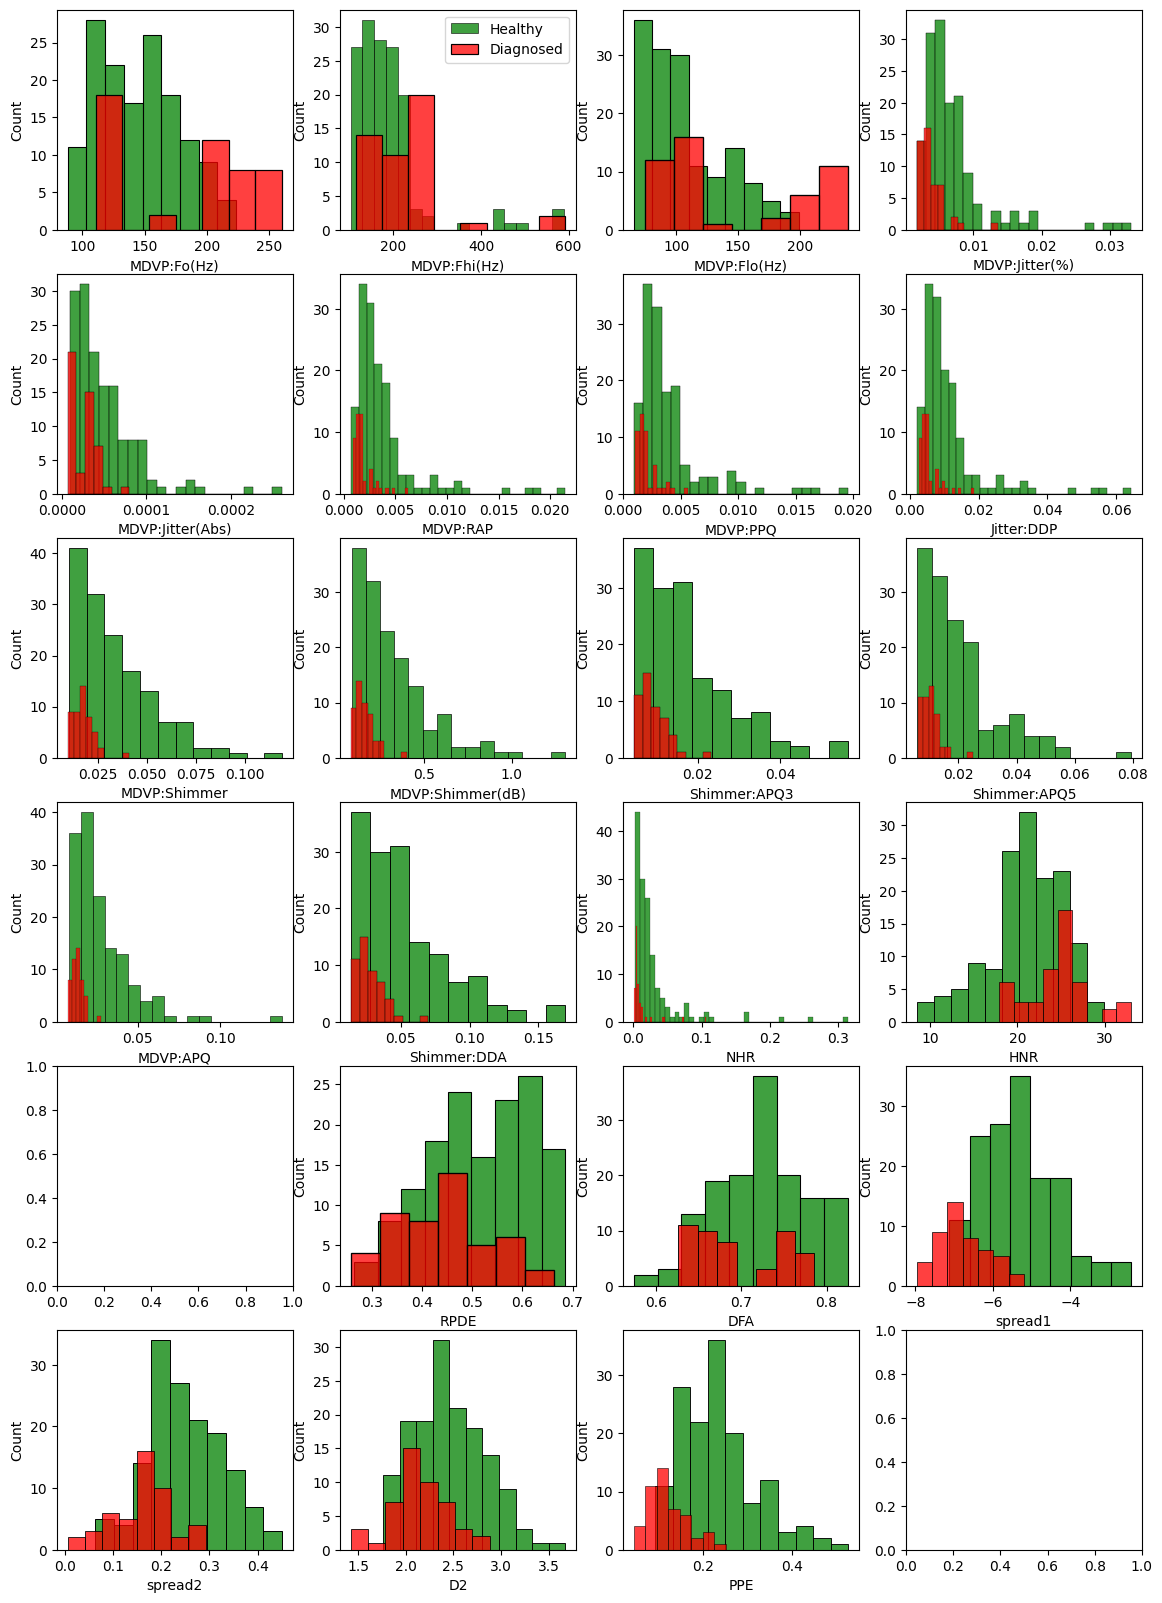

In [8]:
fig, ax = plt.subplots(6,4)
for i, col in enumerate(data.columns[:]):
    if col!='status':
        print(col, i)
        plt.subplot(6,4,i+1)
        sns.histplot(data[data['status']==1][col], color='green', label='Healthy')
        sns.histplot(data[data['status']==0][col], color='red', label='Diagnosed')
        if i == 1:
            plt.legend(loc='upper right')
        else:
            plt.legend().remove()
fig.set_size_inches((14,20))

# Correlation matrix
## You can't have correlation matrix when one of the columns in the dataset is a classification type data (like yes or no). For a correlation matrix to be more insightful, all the values in the dataset has to be continous  
In this case we might get some idea about the correlation between different columns. Because the status column has only two numeric values, 1 (healthy) and 0 (diagnosed), a positive correlation between any column and the status column would mean that an increase in value would mean a higher chance of that person being healthy.  
__However, it important to note that if the labels in the status column were to be inverted, 1 for diagnosed and 0 for healthy, the interpretation of a positive correlation would be opposite to that described in the previous scenario. Hence, it is important to make sure you know the label description in such cases before drawing out conclusions__.

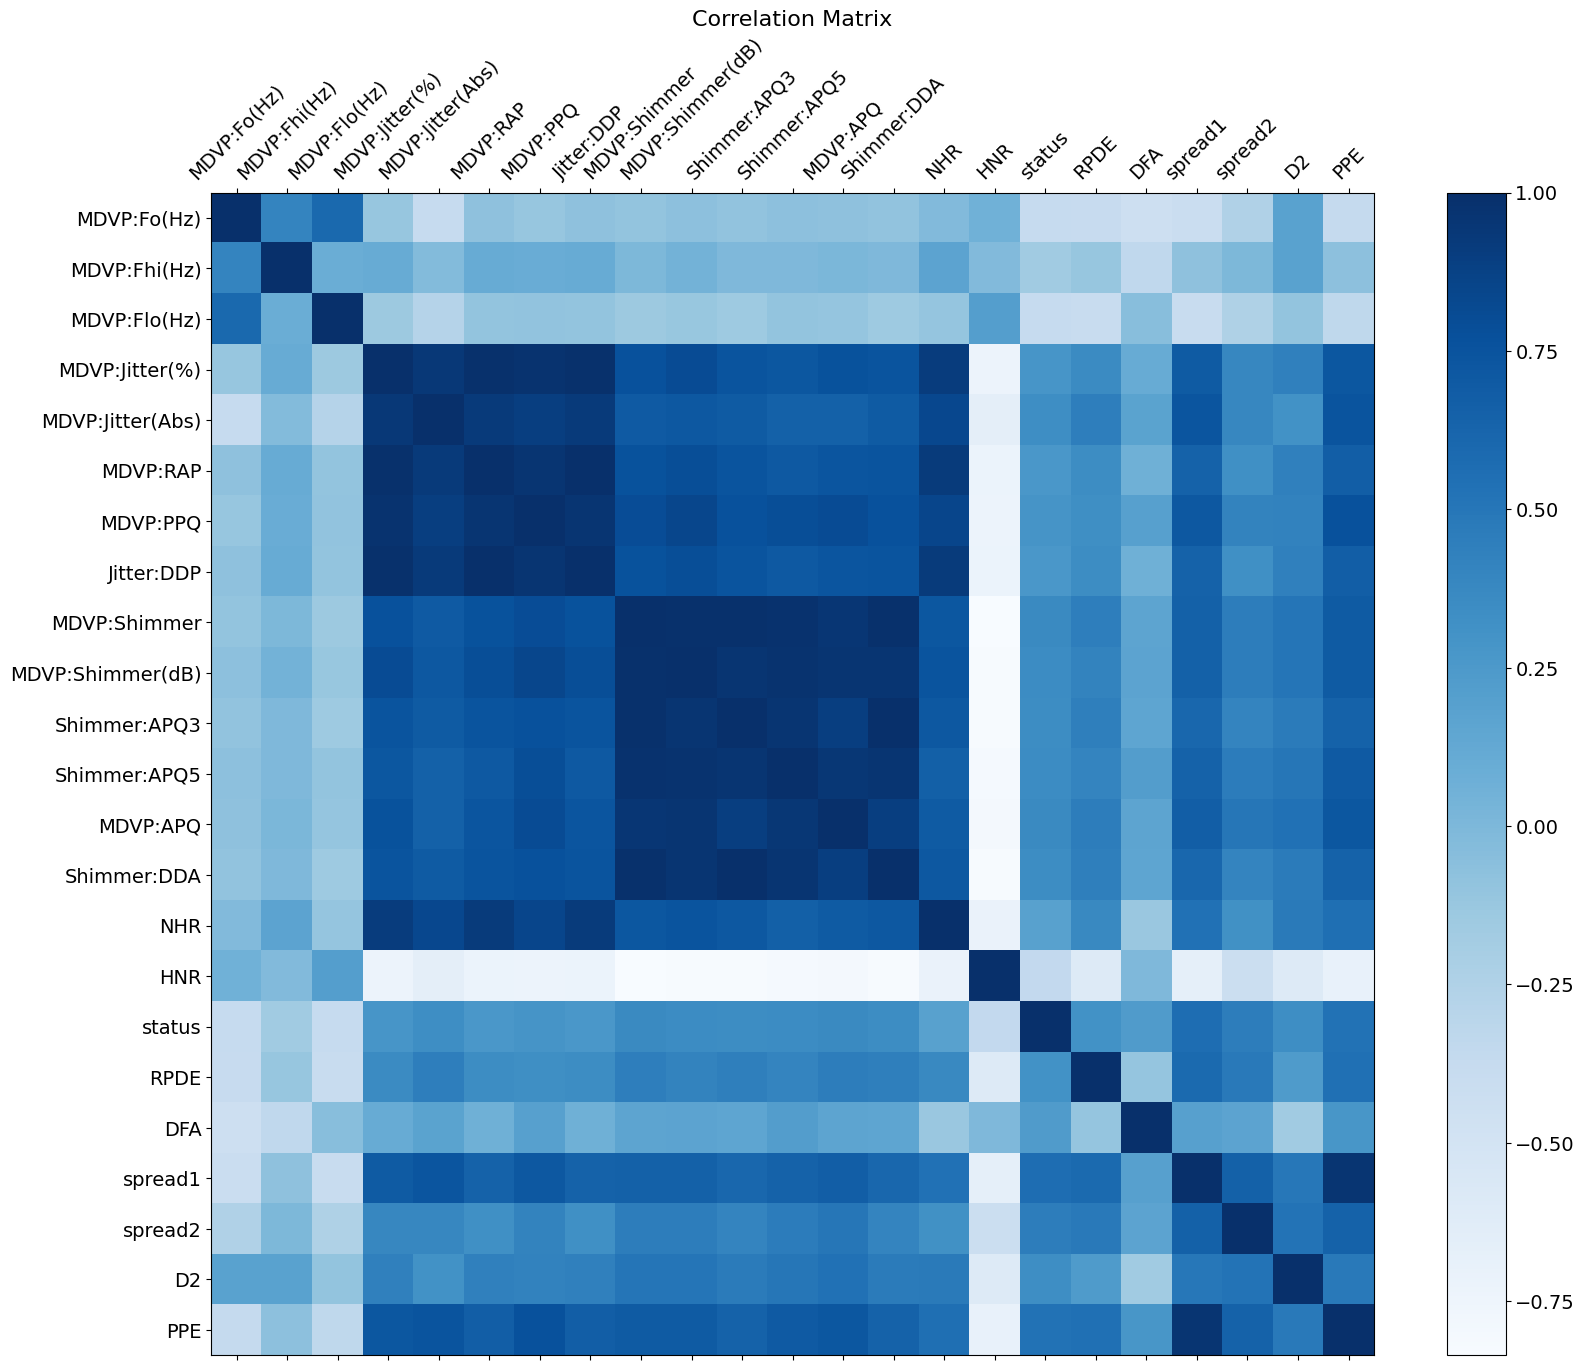

In [9]:
f = plt.figure(figsize=(19, 15))
# plt.imshow()
plt.matshow(data.corr(), fignum=f.number, cmap='Blues')
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
data.select_dtypes(['number']).shape[1]

23

In [11]:
corrM = data.corr()

In [12]:
corrM['status'].reset_index()

,index,status
0,MDVP:Fo(Hz),-0.383535
1,MDVP:Fhi(Hz),-0.166136
2,MDVP:Flo(Hz),-0.380200
3,MDVP:Jitter(%),0.278220
4,MDVP:Jitter(Abs),0.338653
5,MDVP:RAP,0.266668
6,MDVP:PPQ,0.288698
7,Jitter:DDP,0.266646
8,MDVP:Shimmer,0.367430
9,MDVP:Shimmer(dB),0.350697


### __Data Preprocessing and Model Training__

scaling the data

In [8]:
X = data.drop(columns = ['status'])
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [9]:
y = data['status']
y.value_counts()

1    147
0     48
Name: status, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,make_scorer, confusion_matrix
from sklearn.metrics import auc, precision_recall_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Scaled Training Data Mean:", X_train_scaled.mean(axis=0))  
print("Scaled Training Data Std Dev:", X_train_scaled.std(axis=0))
print(confusion_matrix(y_test, y_test))

Scaled Training Data Mean: [ 1.42336285e-17  9.10952225e-17  4.66863015e-16 -1.01770444e-16
 -9.39419482e-17 -1.48029737e-16  1.99270799e-16 -2.41971685e-17
 -1.52299825e-16 -1.32372745e-16  4.19892041e-17  1.97847436e-16
 -1.70803542e-17 -9.67886739e-17 -1.22409205e-16  8.54017711e-17
 -7.71462666e-16  6.77520718e-16 -1.06325205e-15 -5.15257352e-16
  7.89966383e-16 -3.26661775e-16]
Scaled Training Data Std Dev: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[12  0]
 [ 0 27]]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, cross_validate

In [12]:
logistic = LogisticRegression()
dtclass = DecisionTreeClassifier()
gbclass = GradientBoostingClassifier()
rfclass = RandomForestClassifier()
knnclass = KNeighborsClassifier()
xgbclass = XGBClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [13]:
model_dict = {'Logistic Regression': logistic, 'Decision Tree': dtclass, 'Gradient Boost': gbclass, 'Random forest': rfclass, 
             'K nearest neighbors': knnclass, 'XG boost': xgbclass, 'Gaussian NB': gnb, 'Bernoulli NB': bnb}


In [19]:
model_list = list(model_dict.keys())
accuracy_scores = []
precision_scores = []
recall_scores =[]
f1_scores = []
scorer = {'Accuracy': make_scorer(accuracy_score), 'Precision': make_scorer(precision_score),
         'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for key, model in model_dict.items():
    print(key)
    scores = []
    # Generate cross-validated predictions
    cv_scores = cross_validate(model, X_train_scaled, y_train, cv=kf, scoring=scorer)
    
    accuracy_scores.append(np.mean(cv_scores['test_Accuracy']))

    precision_scores.append(np.mean(cv_scores['test_Precision']))

    recall_scores.append(np.mean(cv_scores['test_Recall']))

    f1_scores.append(np.mean(cv_scores['test_F1']))

    

model_performance = {'Model': model_list, 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall':recall_scores,
                     'F1': f1_scores}

Logistic Regression
Decision Tree
Gradient Boost
Random forest
K nearest neighbors
XG boost
Gaussian NB
Bernoulli NB


In [20]:
model_performance = pd.DataFrame(model_performance).sort_values(by='F1', ascending=False)
model_performance

,Model,Accuracy,Precision,Recall,F1
5,XG boost,0.911250,0.928636,0.960256,0.939216
2,Gradient Boost,0.911667,0.927381,0.959615,0.937996
3,Random forest,0.904583,0.912905,0.967949,0.936083
4,K nearest neighbors,0.899167,0.910798,0.962637,0.932936
0,Logistic Regression,0.866250,0.899604,0.935897,0.912184
1,Decision Tree,0.840000,0.903644,0.883537,0.888091
7,Bernoulli NB,0.711667,0.948611,0.678052,0.780015
6,Gaussian NB,0.679583,0.934167,0.642178,0.750455


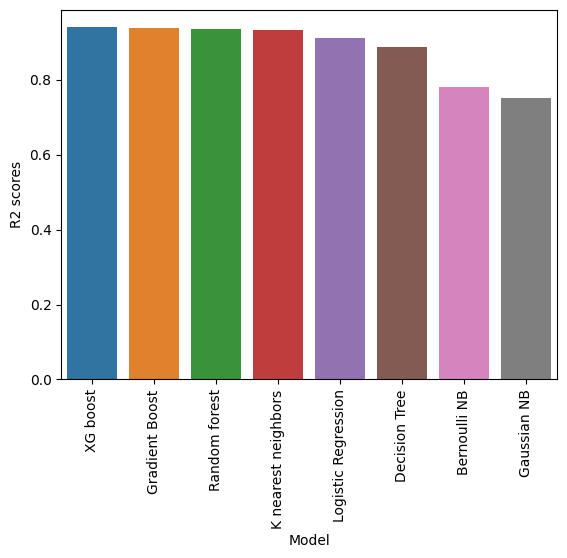

In [21]:
fig = plt.figure()
sns.barplot(x="Model", y='F1',data=model_performance)
plt.xlabel('Model')
plt.ylabel('R2 scores')
# plt.legend()
plt.xticks(rotation=90)
plt.show()
fig.clear()

#### Lets also use XGB's core training API for the classification task and see its performance

In [22]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

params = {
    'objective': 'binary:logistic',  # Multiclass classification                # Number of classes
    'max_depth': 4,
    'eta': 0.3
}

# Training the model
model = xgb.train(params, dtrain, num_boost_round=50)

# Predicting values on the test set
y_pred = model.predict(dtest)
y_pred_labels = []
for i in y_pred:
    if i<0.5:
        y_pred_labels.append(np.floor(i))
    else:
        y_pred_labels.append(np.ceil(i))
    
print(y_pred_labels)
print(precision_score(y_test, y_pred_labels))
print(recall_score(y_test, y_pred_labels))
print(confusion_matrix(y_test, y_pred_labels))

# Evaluating the f1_score
f1 = f1_score(y_test, y_pred_labels)
print(f"f1 score: {f1:.2f}")

[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]
0.9310344827586207
1.0
[[10  2]
 [ 0 27]]
f1 score: 0.96


#### Lets also test the CV techinqiue on XGB's core training API for the classification 

In [23]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [24]:
print(X_train_scaled.shape, y_train.shape)

(156, 22) (156,)


In [25]:
f1_xgb = []
for train_index, test_index in kf.split(X_train_scaled):
    # Splitting data into training and testing sets for this fold
    X_train_new, X_test_new = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_new, y_test_new = y_train.iloc[train_index], y_train.iloc[test_index]
    
    dtrain = xgb.DMatrix(X_train_new, label=y_train_new)
    dtest = xgb.DMatrix(X_test_new, label=y_test_new)
    
    model = xgb.train(params, dtrain, num_boost_round=50)

    # Predicting the values on the test set
    y_pred = model.predict(dtest)
    y_pred_labels = []
    for i in y_pred:
        if i<0.5:
            y_pred_labels.append(np.floor(i))
        else:
            y_pred_labels.append(np.ceil(i))


    # Evaluating the f1_score
    f1 = f1_score(y_test_new, y_pred_labels)
    f1_xgb.append(f1)
    
    
print(f1_xgb)
print('Mean f1 score: ', np.mean(f1_xgb))

[0.8695652173913043, 1.0, 0.782608695652174, 0.9655172413793104, 0.8421052631578947, 0.9565217391304348, 1.0, 1.0, 1.0, 0.8888888888888888]
Mean f1 score:  0.9305207045600007


### Using CV technique to tune hyperparameters for Random forest, Gradient Boost, and KNN classifiers

### _Random forest_

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 2, 10, 20], 'max_features': ['sqrt', 'log2']}
grid_search = GridSearchCV(RandomForestClassifier(verbose=0), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


Testing the model with best parameters

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt')
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))


Precision:  0.84375
Recall:  1.0
f1 score:  0.9152542372881356


### _Gradient Boosting_

In [37]:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [2, 10, 20], 'learning_rate': [0.1, 0.2, 0.4, 0.8], 
              'loss': ['log_loss', 'exponential']}
grid_search = GridSearchCV(GradientBoostingClassifier(verbose=1), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters for Gradient Boosting Classifier: ", grid_search.best_params_)
print("Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.4, 'loss': 'exponential', 'max_depth': 2, 'n_estimators': 200}")

Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.4, 'loss': 'exponential', 'max_depth': 2, 'n_estimators': 200}


Testing with best paramters

In [14]:
gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=2, loss='exponential', learning_rate=0.4)
gb_model.fit(X_train_scaled, y_train)
y_pred = gb_model.predict(X_test_scaled)
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))


Precision:  0.9310344827586207
Recall:  1.0
f1 score:  0.9642857142857143


### _KNN Classifier_

In [39]:
param_grid = {'n_neighbors': [2, 5, 8, 10], 'p': [1, 2], 'algorithm':['ball_tree', 'kd_tree', 'brute']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters for KNN Classifier: ", grid_search.best_params_)

Best parameters for KNN Classifier:  {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1}


Testing with best parameters

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree', p=1)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))


Precision:  0.96
Recall:  0.8888888888888888
f1 score:  0.9230769230769231


### The Gradient Boosting classifier seems to be working the best. Let's use the Precision-Recall curve and calculate the Area Under the Curve (AUC) to see the if that tells the same story

### When to Use ROC vs. Precision-Recall Curves?

ROC (Receiver Operating Characteristic) curves are suitable when the class distribution is balanced, and false positives and false negatives have similar consequences. They depict the trade-off between sensitivity and specificity. In contrast, Precision-Recall curves are preferable when dealing with imbalanced datasets, focusing on positive class prediction performance.

Precision-Recall provides insights into the model’s ability to correctly classify positive instances. Choosing between ROC and Precision-Recall depends on the specific needs of the problem, emphasizing the importance of understanding the data distribution and the consequences of different types of errors.

### Because the dataset is imbalanced (147--> 1 and 48 --> 0), we will make use of the precision-recall curve

In [18]:
## calculating the baseline for the plot as positives/(positives+negatives), positive here is the diagnosed cases
b = 147/(147+48)
b

0.7538461538461538

testing PR curve on Random forest, XGboost and KNN based on the above test

[0.03 0.12 0.18 0.2  0.22 0.35 0.5  0.51 0.53 0.59 0.61 0.66 0.67 0.74
 0.77 0.79 0.81 0.89 0.9  0.92 0.93 0.96 0.97 0.98 0.99 1.  ]


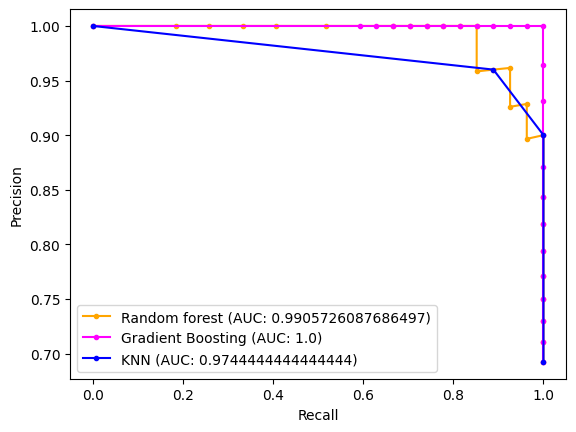

In [19]:
rf_probs = rf_model.predict_proba(X_test_scaled)
rf_precision, rf_recall, rf_threshold = precision_recall_curve(y_test, rf_probs[:,1])
print(rf_threshold)
rf_auc = auc(rf_recall, rf_precision)
knn_probs = knn_model.predict_proba(X_test_scaled)
knn_precision, knn_recall, knn_threshold = precision_recall_curve(y_test, knn_probs[:,1])
knn_auc = auc(knn_recall, knn_precision)
gb_probs = gb_model.predict_proba(X_test_scaled)
gb_precision, gb_recall, gb_threshold = precision_recall_curve(y_test, gb_probs[:,1])
gb_auc = auc(gb_recall, gb_precision)
fig = plt.figure()
# plt.plot([0, 1], [b, b], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', color='orange', label=f'Random forest (AUC: {rf_auc})')
plt.plot(gb_recall, gb_precision, marker='.',color='magenta', label=f'Gradient Boosting (AUC: {gb_auc})')
plt.plot(knn_recall, knn_precision, marker='.', color='b', label=f'KNN (AUC: {knn_auc})')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
fig.clear()

__The PR-curve and the AUC also indicates that the Gradient Boosting algorithm is the best performing__  
Lets see the trade-off between precision and recall

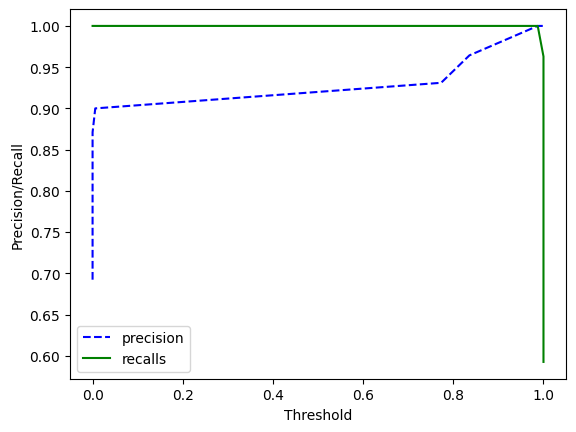

In [20]:
fig = plt.figure()
plt.plot(gb_threshold, gb_precision[:-1], "b--", label='precision')
plt.plot(gb_threshold, gb_recall[:-1], "g-", label='recalls')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()
fig.clear()

__Lets see the most important features when using the Gradient Booisting algorithm__.

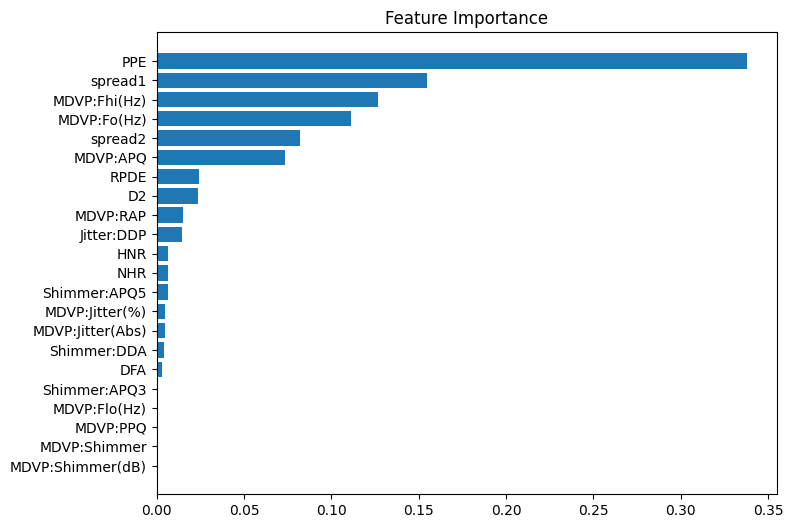

In [17]:
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()
fig.clear()